In [1]:
#First I load the libraries that we need:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import random

#About Data:

#### The MNIST dataset

The MNIST dataset consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

In [2]:
#Now I load the data from tensorflow
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


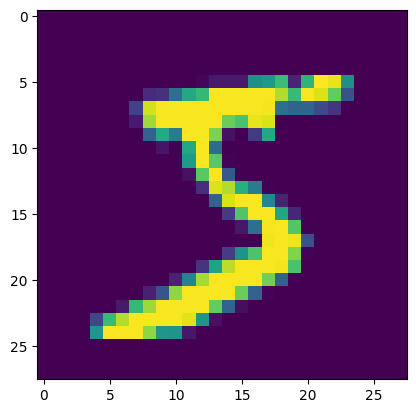

5


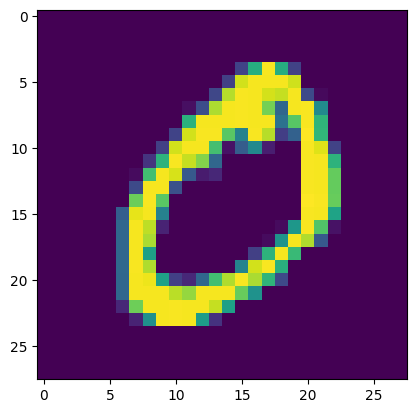

0


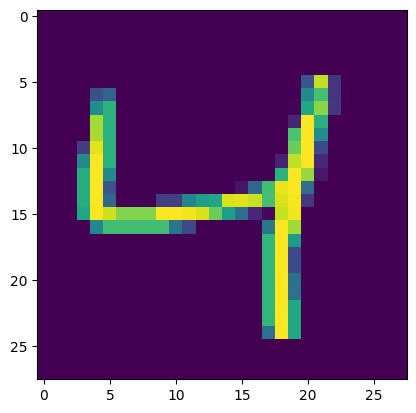

4


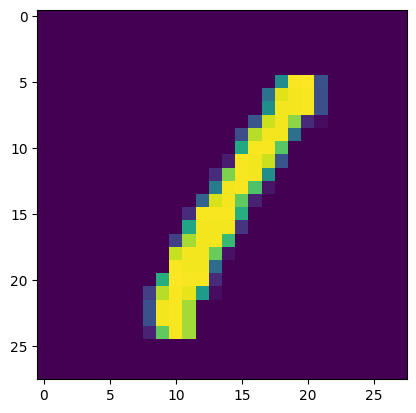

1


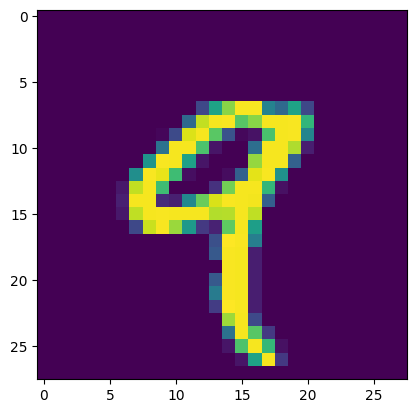

9


In [3]:
#I've written this code to display 6 of the images and their labels
i=0
for i in range(0,5):
  img=train_images[i,:,:]
  label=train_labels[i]
  plt.imshow(img)
  plt.show()
  print(label)

In [4]:
#Here is the model that I've used for the dataset, I've also used dropout to avoid overfitting
model= Sequential([
    Conv2D(50,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Conv2D(40,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(20,(3,3), activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10, activation='softmax')
])

In [5]:
#Let's see the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 50)         0         
 )                                                               
                                                                 
 dense (Dense)               (None, 9, 9, 128)         6528      
                                                                 
 dense_1 (Dense)             (None, 9, 9, 128)         16512     
                                                                 
 dense_2 (Dense)             (None, 9, 9, 128)         16512     
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 40)          46120     
                                                        

In [6]:
#I will creat an early stopping to stop the training if the validation accuracy doesnt imporve after 3 epochs
es=EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

In [7]:
#We compile the model using the adam optimizer, the sparse categorical crossentropy for the loss function and accuracy as our metric
model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
#I fit the model and run it for 15 epochs, I also use the validation split to check for overfitting and the early stopping mentioned above as a callback
history= model.fit(train_images, train_labels, epochs=15, validation_split=0.1, callbacks=[es])

Epoch 1/15
1688/1688 [==============================] - 30s 9ms/step - loss: 0.4397 - accuracy: 0.8625 - val_loss: 0.7239 - val_accuracy: 0.8770
Epoch 2/15
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1495 - accuracy: 0.9620 - val_loss: 0.0888 - val_accuracy: 0.9828
Epoch 3/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1107 - accuracy: 0.9746 - val_loss: 0.0641 - val_accuracy: 0.9862
Epoch 4/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0987 - accuracy: 0.9780 - val_loss: 0.0616 - val_accuracy: 0.9878
Epoch 5/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0902 - accuracy: 0.9802 - val_loss: 0.0890 - val_accuracy: 0.9807
Epoch 6/15
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0788 - accuracy: 0.9830 - val_loss: 0.0546 - val_accuracy: 0.9897
Epoch 7/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0749 - accuracy: 0.9838 - val_loss: 0.1893 - val_a

In [9]:
#I use the Pandas library to creat a data fram from the model's history so that the details of the model's performance on every epoch can be seen
df= pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.439703,0.862537,0.723890,0.877000
1,0.149547,0.962000,0.088779,0.982833
2,0.110723,0.974648,0.064144,0.986167
3,0.098711,0.978000,0.061625,0.987833
4,0.090236,0.980204,0.088962,0.980667
5,0.078782,0.982982,0.054553,0.989667
6,0.074855,0.983796,0.189288,0.989333
7,0.070900,0.985426,0.046260,0.991500
8,0.073131,0.985148,0.050897,0.991667
9,0.063942,0.986926,0.066561,0.988500


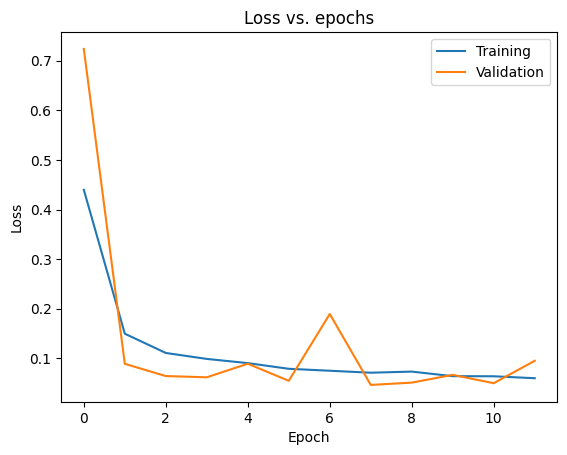

In [10]:
# I plotted the loss for both training and validation to make sure we have avoided overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


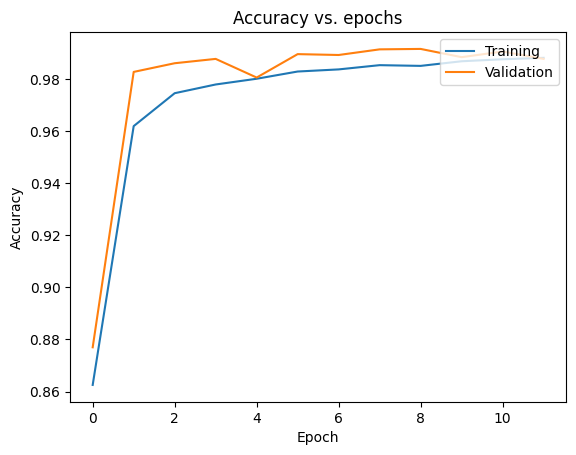

In [11]:
# I've also done the same with accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
#Finally I evaluate the perfomance of our model on the test set:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.1022 - accuracy: 0.9876


[0.10224635899066925, 0.9876000285148621]

1/1 [==============================] - 0s 20ms/step


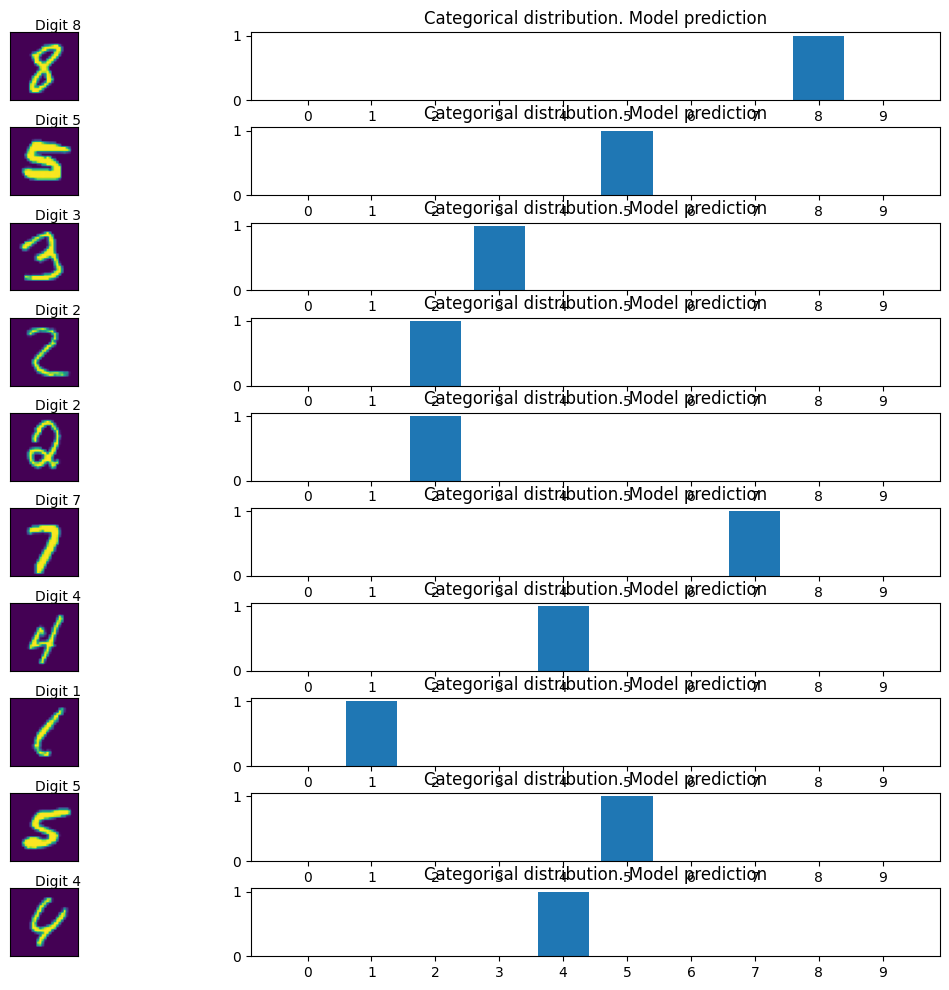

In [14]:
#Here I write this code to get 10 images random out of the test set and see the model's Categorical distribution and prediction alongside their real label
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 10)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(10, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(0,10), prediction)
    axes[i, 1].set_xticks(np.arange(0,10))
    axes[i, 1].set_title("Categorical distribution. Model prediction")

plt.show()